The Original Datasethere

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

## Step1
1.  Imported Needed Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import pandas as pd     

## Step 2
1. Reading Data From PC & Divide To Two Category ['Cats' ,'Dogs']
2. Display Some Images From Dogs & Cats

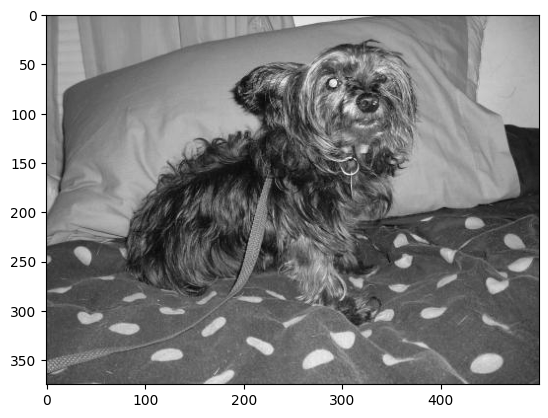

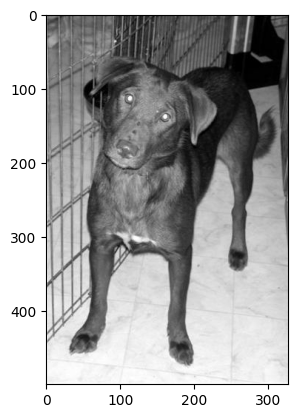

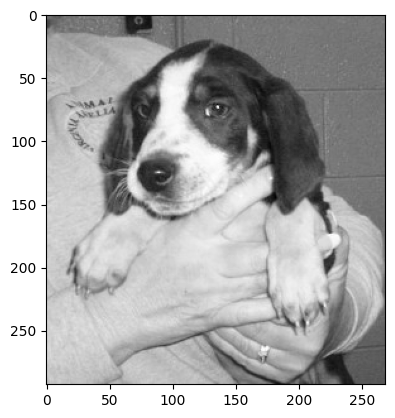

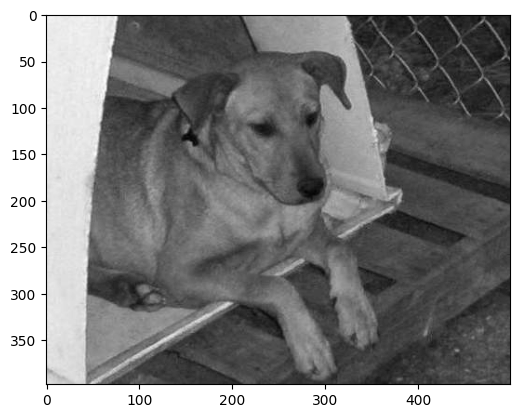

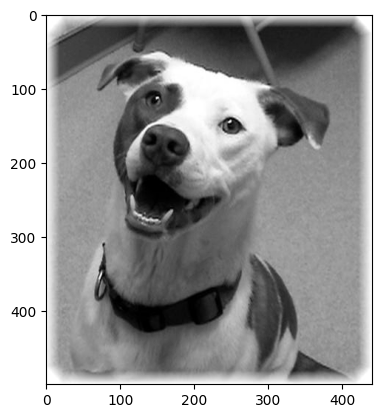

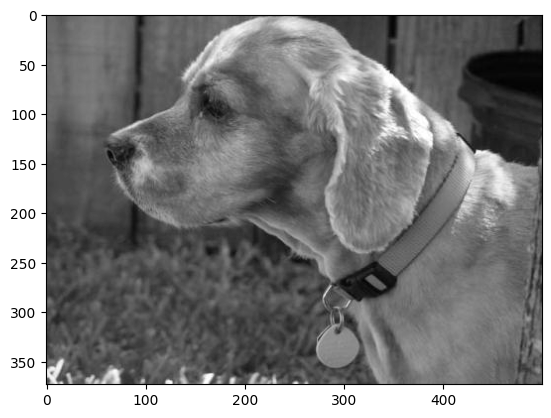

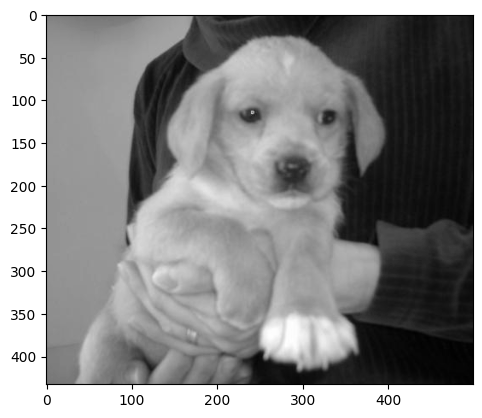

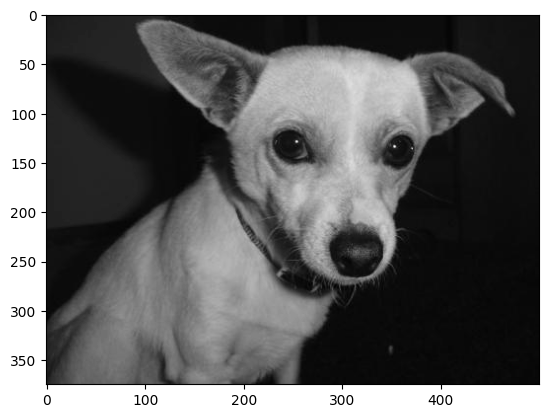

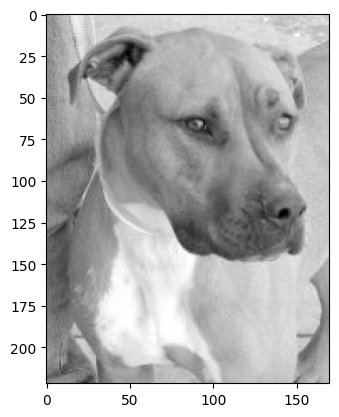

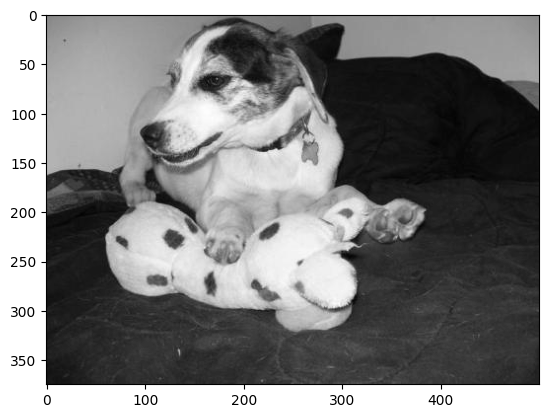

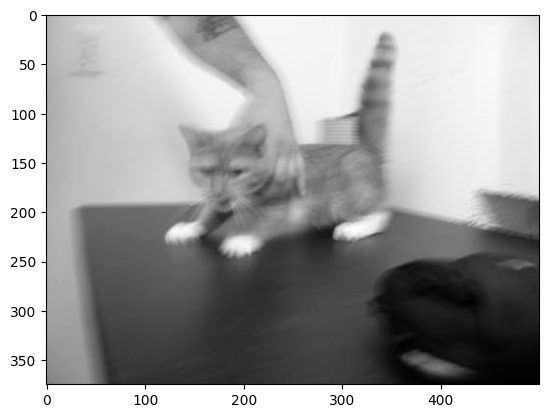

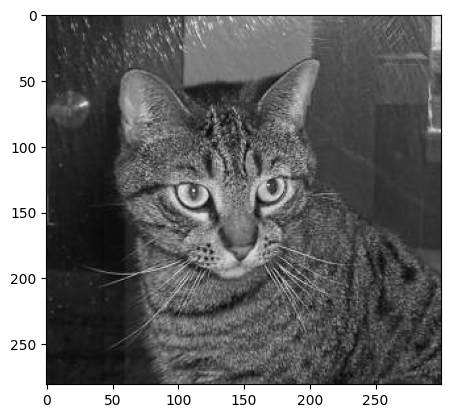

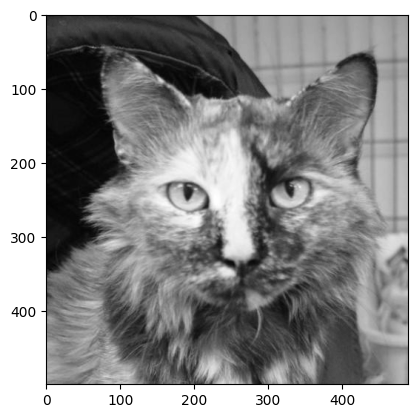

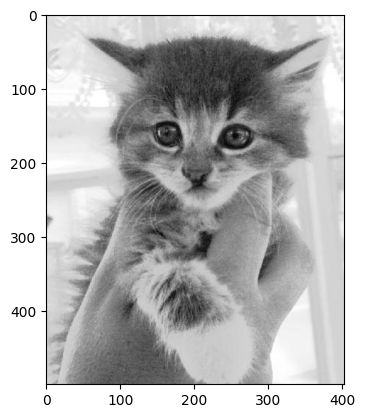

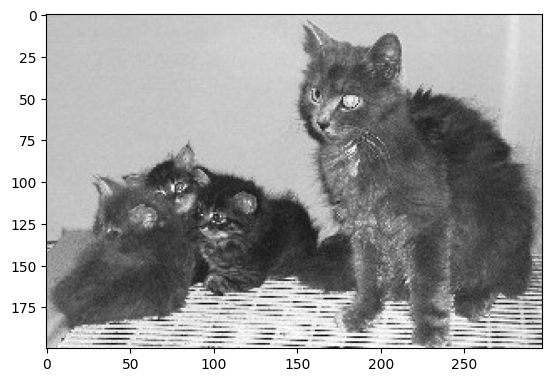

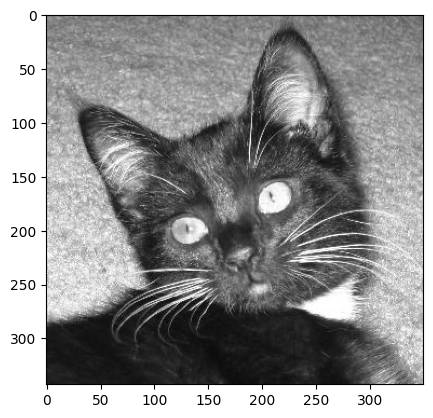

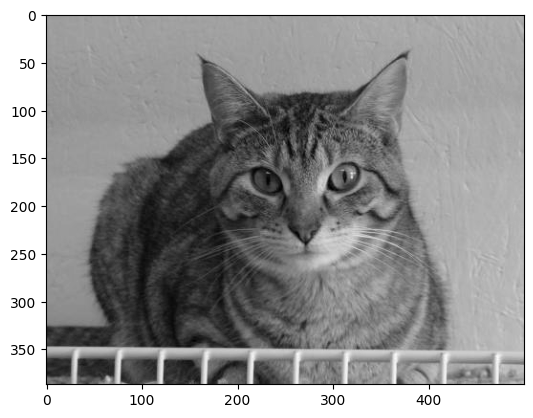

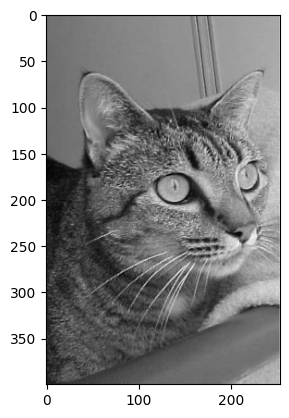

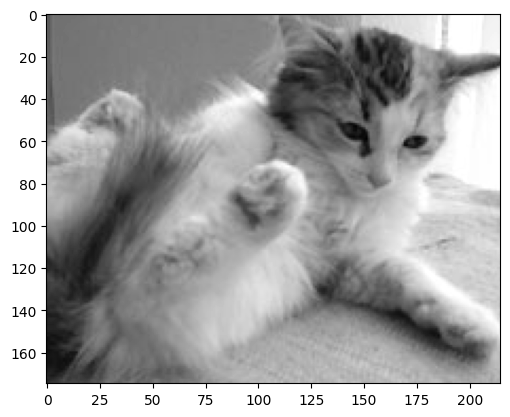

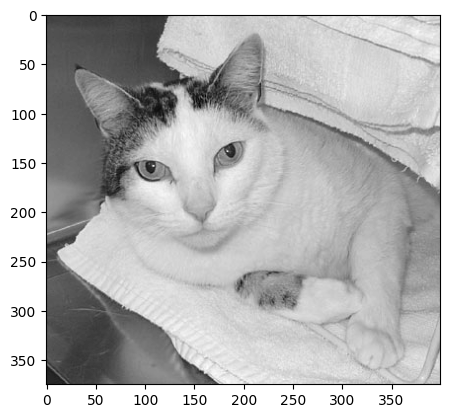

In [2]:
DATADIR = r'D:\PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            break  

## Step 3 
1. Show Shape Of Data 
2. Show Matrix For Last Element

In [4]:
print('The Sahpe Of Image Array Is ==> ',img_array.shape)
print(img_array)

The Sahpe Of Image Array Is ==>  (375, 400)
[[ 58  59  59 ... 193 192 192]
 [ 59  59  60 ... 190 191 192]
 [ 59  60  61 ... 188 187 187]
 ...
 [ 37  37  37 ... 174 173 169]
 [ 37  37  36 ... 176 179 180]
 [ 36  36  36 ... 168 171 172]]


# Step 4
1. Make Resize For Image By Using Open Cv Library (cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)))

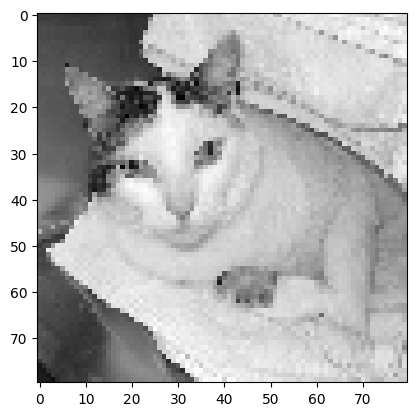

In [6]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# Step 5 (Resize By Using Opencv Library)
1. Make Resize For All Data 

In [7]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()
print(len(training_data))

100%|██████████| 500/500 [00:01<00:00, 285.89it/s]

999


# Step 6 ==> Make Shuffling For Data 

In [8]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
0
1
1
0
1


# Step 7
1. Make Reshape For Data After Making Shuffling Because Image To Return The Same Dimensionally 80 * 80

In [9]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[192]
   [191]
   [192]
   ...
   [ 50]
   [ 46]
   [ 44]]

  [[193]
   [189]
   [191]
   ...
   [ 48]
   [ 44]
   [ 47]]

  [[193]
   [190]
   [192]
   ...
   [ 44]
   [ 45]
   [ 40]]

  ...

  [[110]
   [119]
   [117]
   ...
   [116]
   [105]
   [102]]

  [[113]
   [114]
   [114]
   ...
   [113]
   [112]
   [112]]

  [[122]
   [115]
   [112]
   ...
   [114]
   [109]
   [111]]]]


# Step 8

In [10]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Step 9 ==> Create NN

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

# Step 10 ==> Make Fitting For Model

In [ ]:
model.fit(X, y, epochs=3)

# Step 11

In [ ]:
test_loss, test_acc = model.evaluate(X,y)
test_acc